# Experimentation
* Data 2000

In [33]:
import pandas as pd
import numpy as np
from time import time
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import KFold
%matplotlib inline
%run -i ../../tools/label_encoder.py

## Estadisticos y Errores
## Metrics

The metric that will be taken into acount in this project mean of the absolute value of the differences, also known as MEAN ABSOLUTE ERROR.  

The form of the metric is the following:

Metric = $\frac{\sum|Y.Real-Y.Prediction|}{n}$  

Knowing that ***n*** is the shape of the target.


In [103]:
def MAD(Y, YP): #MAE - MEAN ABSOLUTE ERROR FOR ME
    m = np.mean(abs(Y-YP))
    return m

In [101]:
def plot_predictions(Model, c, X, Y, kf): #PERFECT FUNCTION - DECIDED IF LET IT GET THE SCORES OR NOT
    fig, axes = plt.subplots(2, 3, sharex=False, figsize=(13, 8))
    axs = [i for i in axes.flatten()]
    j = 0
    for n, i in (kf):
        New_X = data_2000.filter(items = X_list)
        New_Y = data_2000.filter(items = y_list)
        ax = axs[j]
        Model.fit(X.iloc[n], Y[c].iloc[n])
        Y_pred = Model.predict(X.iloc[i])
        print('mean_score:', MAD(Y[c].iloc[i], Y_pred))
        ax.plot(Y[c].iloc[i], Y_pred)
        ax.set_title('Fold: '+str(j))
        ax.set_xlabel('Real_Value')
        ax.set_ylabel('Prediction')
        j += 1
        ax.grid()
    plt.tight_layout(h_pad=2)

In [ ]:
def get_exp_prediction(exp, S_Data, target, folds):
    """Required the exponent, the sorted data by values of the target, and the column that will be analyzed return the
    score of the model, and the plot of the prediction"""
    y_list = ['PUNT_BIOLOGIA', 'PUNT_MATEMATICAS', 'PUNT_FILOSOFIA', 'PUNT_FISICA', 'PUNT_HISTORIA', 'PUNT_QUIMICA', 
          'PUNT_LENGUAJE', 'PUNT_GEOGRAFIA', 'PUNT_INTERDISCIPLINAR', 'PUNT_IDIOMA']
    X_list = S_Data.columns.difference(y_list)
    New_X = S_Data.filter(items = X_list)
    exped_X = New_X**exp
    Y_train = D_sorted.filter(items = y_list)
    
    k = KFold(exped_X.shape[0], n_folds=folds) #Number of kfolds
    Lm = LinearRegression()
    scores = cross_val_score(Lm, exped_X, Y_train[target], scoring='neg_mean_absolute_error', cv=k, n_jobs=-1)
    
    print('The Model with the Data raised to the power of', exp, 'give this scores:')
    print(scores)
    print('The mean of the scores is:', np.mean(scores))
    plot_predictions(Lm, target, exped_X, Y_train, k)

In [ ]:
def get_Poly_prediction(deg, D_sorted, c):
    """Required the degree to the PolynomialFeature object and the sorted data by values of the target,
    return the score of the model, statistics and the plots of the prediction"""
    start_time = time()
    y_list = ['PUNT_BIOLOGIA', 'PUNT_MATEMATICAS', 'PUNT_FILOSOFIA', 'PUNT_FISICA', 'PUNT_HISTORIA', 'PUNT_QUIMICA', 
          'PUNT_LENGUAJE', 'PUNT_GEOGRAFIA', 'PUNT_INTERDISCIPLINAR', 'PUNT_IDIOMA']
    X_list = D_sorted.columns.difference(y_list)
    
    New_X = D_sorted.filter(items = X_list)
    Y_train = D_sorted.filter(items = y_list)
    
    Poly = PolynomialFeatures(degree = deg)
    Poly_X = Poly.fit_transform(New_X)
    
    Lm = LinearRegression()
    Lm.fit(Poly_X, Y_train[c])
    print('The Model with the new "PolyData" with degree', deg, 'gives:')
    print('Score:', Lm.score(Poly_X, Y_train[c])*100)
    LR_Statistics(Poly_X, Y_train[c], Lm.predict(Poly_X))
    plot_predictions(Lm, c, Poly_X, Y_train)
    del(Poly, Lm)
    print('The prediction took:', time()-start_time, 'seconds')

In [6]:
data_2000 = pd.read_csv('../../DatosFTPICFES/SABER11/SB11-BASES_DE_DATOS/READY/2000_1.csv', delimiter=';')

In [7]:
data_2000.head()

,COLE_COD_ICFES,IND_ANNO_TERMINO_BACHILLERATO,COLE_JORNADA,COLE_VALOR_PENSION,ESTU_GENERO,ESTU_NACIMIENTO_DIA,ESTU_NACIMIENTO_MES,ESTU_NACIMIENTO_ANNO,ESTU_LIMITA_INVIDENTE,ESTU_LIMITA_SORDONOINTERPRETE,...,FAMI_OCUPA_MADRE,FAMI_NUM_HERMANOS,FAMI_NUM_HERMANOS_EDUSUPERIOR,FAMI_SOST_PERSONAL,ESTU_TRABAJA,ESTU_ACT_PROX_ANNO,COLE_CALENDARIO,COLE_CARACTER,ESTU_RESIDE_DEPTO,ESTU_RESIDE_MCPIO
0,83048,1999,0,3.0,0,19.0,3.0,1981.0,1,0,...,1,9,2,2,0,1,2,0,3,38
1,3327,2000,0,8.0,0,28.0,4.0,1982.0,1,0,...,10,2,2,2,0,1,1,0,2,33
2,19364,2000,0,7.0,1,30.0,4.0,1982.0,1,0,...,4,1,1,2,0,2,1,0,3,38
3,19364,2000,0,7.0,1,6.0,8.0,1982.0,1,0,...,4,0,0,2,0,3,1,0,3,38
4,24281,2000,0,7.0,0,16.0,4.0,1982.0,1,0,...,4,1,1,2,0,1,1,0,3,38


In [41]:
y_list = ['PUNT_BIOLOGIA', 'PUNT_MATEMATICAS', 'PUNT_FILOSOFIA', 'PUNT_FISICA', 'PUNT_HISTORIA', 'PUNT_QUIMICA', 
          'PUNT_LENGUAJE', 'PUNT_GEOGRAFIA', 'PUNT_INTERDISCIPLINAR', 'PUNT_IDIOMA']
X_list = data_2000.columns.difference(y_list)
S_data = data_2000.sort_values(by='PUNT_BIOLOGIA')
X = S_data.filter(items = X_list)
Y = S_data.filter(items = y_list)

In [42]:
k = 5 #Number of kfolds
Lm = LinearRegression()
scores = cross_val_score(Lm, X, Y['PUNT_BIOLOGIA'], scoring='mean_absolute_error', cv=k, n_jobs=-1)
print('Scores:', -scores)
print('Mean of the Scores:', np.mean(-scores))

Scores: [  9.18714891   3.22572637   2.21509877   3.97783557  10.49610886]
Mean of the Scores: 5.82038369647


In [74]:
kf = KFold(X.shape[0], n_folds=5)
print(kf) 

sklearn.cross_validation.KFold(n=77508, n_folds=5, shuffle=False, random_state=None)


In [75]:
Lr = LinearRegression()
scores = cross_val_score(Lr, X, Y['PUNT_BIOLOGIA'], scoring='mean_absolute_error', cv=kf, n_jobs=-1)
print('Scores:', -scores)
print('Mean of the Scores:', np.mean(-scores))

Scores: [  9.18714891   3.22572637   2.21509877   3.97783557  10.49610886]
Mean of the Scores: 5.82038369647


<span style='color: red'>ESTO HACE LO MISMO QUE EL CROSSVALIDATION PERO MANUALMENTE, Y ASI OBTENGO LOS PREDICT DEL MODELO PARA GRAFICARLOS  </span> 

* mi problema es obtener los predict del crossvalidation para poder graficar, porque el crossvalidation solo me da los scores.

In [88]:
for i, j in kf:
    Lr.fit(X.iloc[i], Y['PUNT_BIOLOGIA'].iloc[i])
    print('MAD:', MAD(Y['PUNT_BIOLOGIA'].iloc[j], Lr.predict(X.iloc[j])))
    print()

MAD: 9.187148908056187

MAD: 3.2257263718241167

MAD: 2.215098771870991

MAD: 3.9778355678077295

MAD: 10.49610886276872



mean_score: 9.187148908056187
mean_score: 3.2257263718241167
mean_score: 2.215098771870991
mean_score: 3.9778355678077295
mean_score: 10.49610886276872


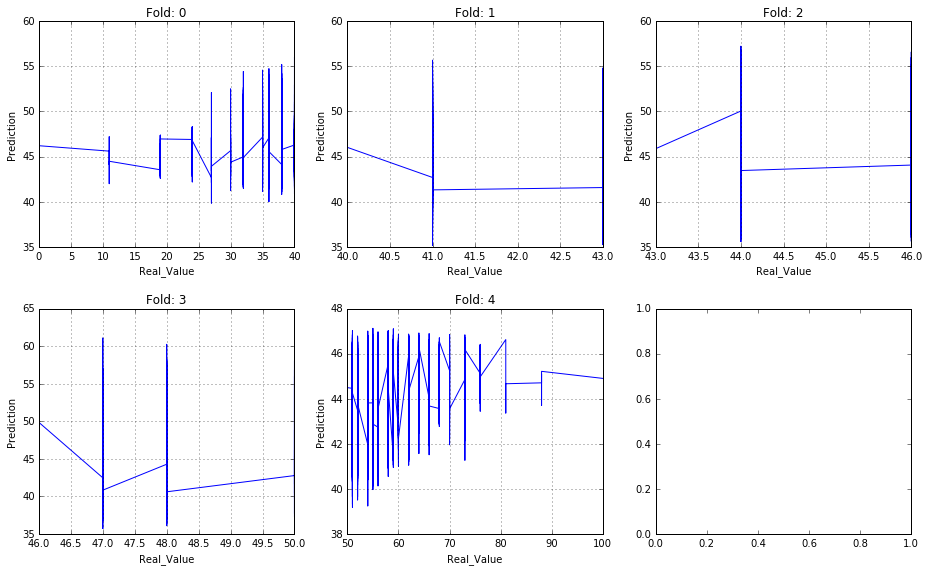

In [102]:
plot_predictions(Lr, 'PUNT_BIOLOGIA', X, Y, kf)